In [2]:
# Importations
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

In [ ]:
# Loading the btc data
df = pd.read_csv("btc_data.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-07-01,9228.325195,9309.754883,9104.735352,9145.985352,15971550355
1,2020-07-02,9123.410156,9274.962891,9036.623047,9231.139648,16338916796
2,2020-07-03,9087.303711,9202.344727,9058.794922,9124.842773,13078970999
3,2020-07-04,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
4,2020-07-05,9073.942383,9162.183594,8977.015625,9126.090820,12903406143


In [ ]:
# Setting the index to date
df.set_index("Date", inplace=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-07-01,9228.325195,9309.754883,9104.735352,9145.985352,15971550355
2020-07-02,9123.410156,9274.962891,9036.623047,9231.139648,16338916796
2020-07-03,9087.303711,9202.344727,9058.794922,9124.842773,13078970999
2020-07-04,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
2020-07-05,9073.942383,9162.183594,8977.015625,9126.090820,12903406143


In [ ]:
# Want to check the index type
df.index

Index(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
       ...
       '2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04', '2025-07-05',
       '2025-07-06', '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10'],
      dtype='object', name='Date', length=1836)

In [ ]:
# Setting the index type from 'object' to 'datetime'
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10',
               ...
               '2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-05', '2025-07-06', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10'],
              dtype='datetime64[ns]', name='Date', length=1836, freq=None)

In [8]:
# Localising the index
df.index = df.index.tz_localize("UTC").tz_convert("America/Los_Angeles")
df.index

DatetimeIndex(['2020-06-30 17:00:00-07:00', '2020-07-01 17:00:00-07:00',
               '2020-07-02 17:00:00-07:00', '2020-07-03 17:00:00-07:00',
               '2020-07-04 17:00:00-07:00', '2020-07-05 17:00:00-07:00',
               '2020-07-06 17:00:00-07:00', '2020-07-07 17:00:00-07:00',
               '2020-07-08 17:00:00-07:00', '2020-07-09 17:00:00-07:00',
               ...
               '2025-06-30 17:00:00-07:00', '2025-07-01 17:00:00-07:00',
               '2025-07-02 17:00:00-07:00', '2025-07-03 17:00:00-07:00',
               '2025-07-04 17:00:00-07:00', '2025-07-05 17:00:00-07:00',
               '2025-07-06 17:00:00-07:00', '2025-07-07 17:00:00-07:00',
               '2025-07-08 17:00:00-07:00', '2025-07-09 17:00:00-07:00'],
              dtype='datetime64[ns, America/Los_Angeles]', name='Date', length=1836, freq=None)

In [9]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-30 17:00:00-07:00,9228.325195,9309.754883,9104.735352,9145.985352,15971550355
2020-07-01 17:00:00-07:00,9123.410156,9274.962891,9036.623047,9231.139648,16338916796
2020-07-02 17:00:00-07:00,9087.303711,9202.344727,9058.794922,9124.842773,13078970999
2020-07-03 17:00:00-07:00,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
2020-07-04 17:00:00-07:00,9073.942383,9162.183594,8977.015625,9126.090820,12903406143


In [ ]:
# Dropping the columns we wont be using
df.drop(columns=["High", "Low", "Open", "Volume"], inplace=True)
df.head()

In [15]:
df.shape

(1836, 1)

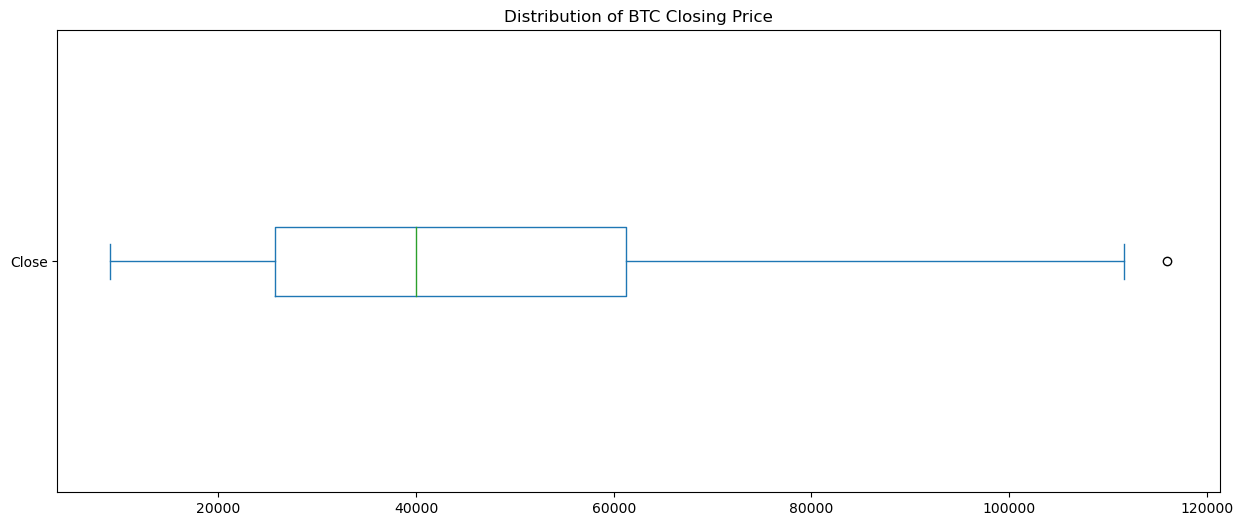

In [17]:
# Visualizing the distribution of closing price
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(
    kind="box",
    vert=False,
    title="Distribution of BTC Closing Price",
    ax=ax);